Hyperparameters
control model behavior (capacity)
* nb layers
* nb nodes
* learning rate

Validation set => to validate generalization of the model
by fine tuning the hyperparameters

3 sets of data:
1. training set => to increase accuracy and train the model
2. validation set => to increase generalization of the model
3. test set => final evaluation

# imports

In [29]:
    import numpy as np
    import matplotlib.pyplot as plt
    import keras
    from keras.datasets import mnist
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.optimizers import Adam
    from keras.utils.np_utils import to_categorical
    import random
    # for image feeding into NN
    import requests
    from PIL import Image
    import cv2

# Getting data and checking its integrity
## getting data

In [5]:
(X_train, y_train), (X_test, y_test)=mnist.load_data()
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)


## checking

In [6]:
    assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
    assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
    assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
    assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

## plotting sample of data

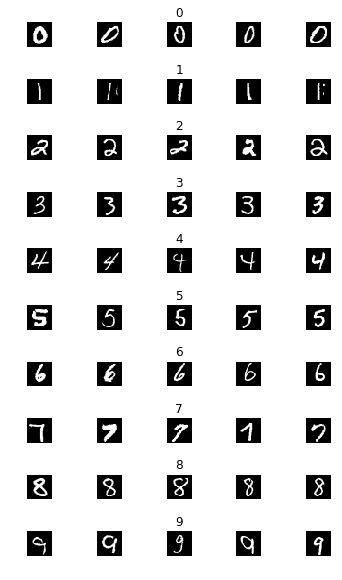

In [7]:
    num_of_samples = []
     
    cols = 5
    num_classes = 10
     
    fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
    fig.tight_layout()
    for i in range(cols):
        for j in range(num_classes):
            x_selected = X_train[y_train == j]
            axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
            axs[j][i].axis("off")
            if i == 2:
                axs[j][i].set_title(str(j))
                num_of_samples.append(len(x_selected))

## plotting distribution of numbers 
better if balanced 

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

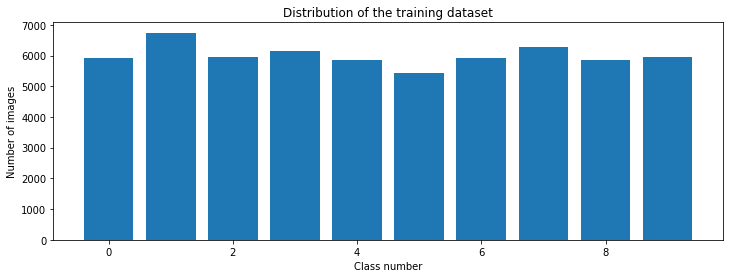

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

# Trying ANN
No convolutional NN

In [10]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

28x28=784 pixels (matrix)
=> flattenened into single vector of size 784

In [13]:
# transformations to match shape of input for NN

X_train = X_train/255 
X_test = X_test/255
 
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
def create_model():
    model = Sequential()
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
 
model = create_model()

In [16]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                7850      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


Important : 10% of training will be put into validation set (validation split) to avoid overfitting

In [24]:
history = model.fit(X_train, y_train,
                    validation_split=0.1,
                    epochs = 15, batch_size = 200, 
                    verbose = 1, shuffle = 1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/15
54000/54000 [==============================] - 5s 86us/step - loss: 0.5080 - acc: 0.8366 - val_loss: 0.2435 - val_acc: 0.9300
Epoch 2/15
54000/54000 [==============================] - 3s 47us/step - loss: 0.2832 - acc: 0.9151 - val_loss: 0.1997 - val_acc: 0.9428
Epoch 3/15
54000/54000 [==============================] - 3s 47us/step - loss: 0.2470 - acc: 0.9266 - val_loss: 0.2012 - val_acc: 0.9387
Epoch 4/15
54000/54000 [==============================] - 3s 51us/step - loss: 0.2331 - acc: 0.9304 - val_loss: 0.1941 - val_acc: 0.9417
Epoch 5/15
54000/54000 [==============================] - 3s 59us/step - loss: 0.2130 - acc: 0.9356 - val_loss: 0.1776 - val_acc: 0.9472
Epoch 6/15
54000/54000 [==============================] - 3s 61us/step - loss: 0.2076 - acc: 0.9376 - val_loss: 0.1730 - val_acc: 0.9503
Epoch 7/15
54000/54000 [==============================] - 3s 59us/step - loss: 0.2056 - acc: 0.9375 - val_loss: 0.1853 - val_acc:

Text(0.5, 0, 'epoch')

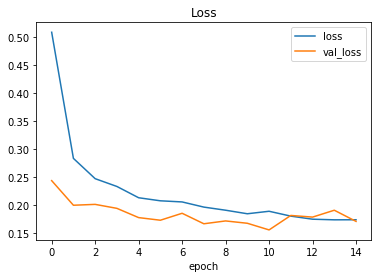

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Illustration of **overfitting** over 12 epochs: validation loss doesn't decrease anymore while loss is still decreasing

Text(0.5, 0, 'epoch')

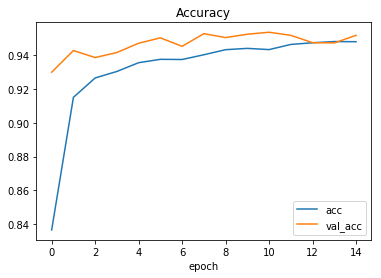

In [26]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

## checking model on a new image
### getting image

In [38]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response=requests.get(url,stream=True)
img=Image.open(response.raw)

In [33]:
response?

Type:        Response
String form: <Response [200]>
File:        ~/anaconda3/lib/python3.7/site-packages/requests/models.py
Docstring:  
The :class:`Response <Response>` object, which contains a
server's response to an HTTP request.


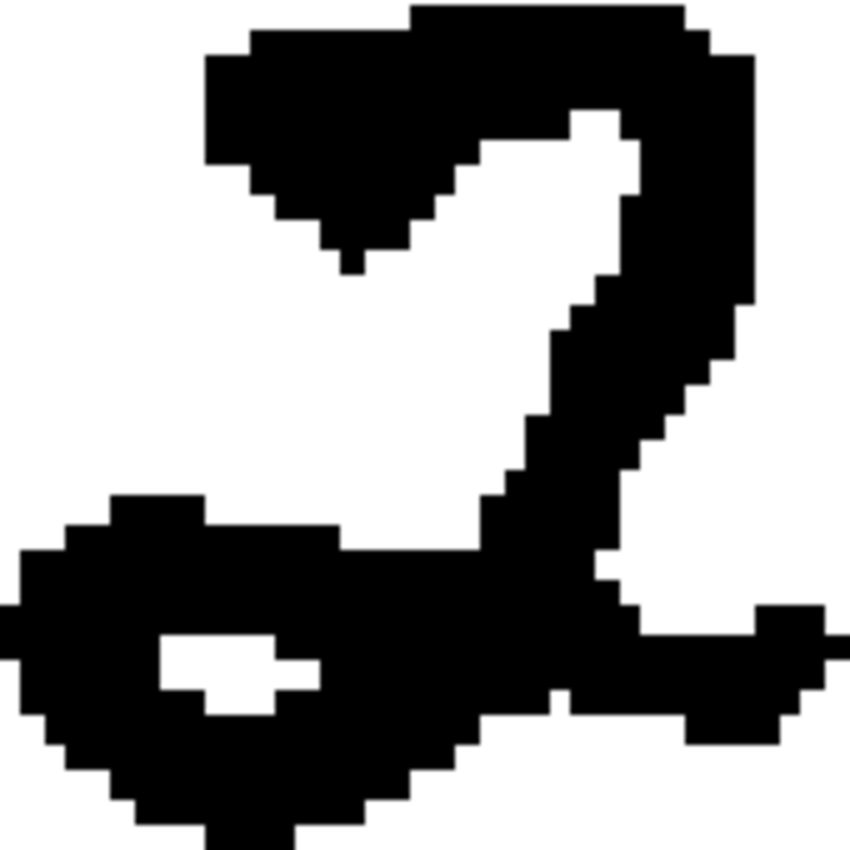

In [37]:
img

### adapting image to input format for NN

In [53]:
# converting to array
img_arr=np.asarray(img)
# resizing 28x28
image=cv2.resize(img_arr,(28,28))
# making in greyscale
image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# inverting colors
image=cv2.bitwise_not(image)
# values 0 to 1
image=image/255
# reshaping as vector
image=image.reshape(1,28*28)
# prediction
model.predict_classes(image)

array([6])

**Misclassified 2 as 6 : limitations of NN to deal with images**

**CNN perform better**

In [42]:
img_arr

array([[[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       ...,

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        ...,
        [255, 255, 255, 255],
        [255, 255, 255, 255],
        [255, 255, 255, 255]],

       [[255

In [51]:
image

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.4627451 , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 0.87058824, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 0.00784314, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.  